https://github.com/thakarprathamesh/Time-Series-Analysis/blob/master/Stock_Market_Analysis.ipynb

In [1]:
import xgboost

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn

from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller,kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

from pmdarima.arima import auto_arima
import statsmodels.graphics.tsaplots as tsaplot
from statsmodels.tsa.holtwinters import Holt, ExponentialSmoothing, SimpleExpSmoothing
import plotly.graph_objects as go
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import permutations
from fbprophet import Prophet

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.style as style

from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Users\user\anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\msj.ttf',size=14)
sns.set(font=myfont.get_family())
sns.set_style({"font.sans-serif":['Microsoft JhengHei']})
# style.use('fivethirtyeight')
#

In [4]:
raw_col = ['date', 'highest', 'high', 'mid', 'low', 'ave', 'ave_dif', 'volume', 'vol_dif', 'resid']
raw = pd.read_csv('FS443.csv',names=raw_col).drop(['ave_dif', 'vol_dif', 'resid'], axis=1)
raw

,date,highest,high,mid,low,ave,volume
0,087/12/01,195,131,77,59,84.0,327
1,087/12/02,165,144,111,93,113.0,456
2,087/12/03,204,160,82,65,94.0,432
3,087/12/04,189,161,114,80,116.0,583
4,087/12/06,181,157,90,55,96.0,"1,052"
...,...,...,...,...,...,...,...
6639,109/11/26,201,201,137,67,134.9,97
6640,109/11/27,170,170,112,52,111.8,176
6641,109/11/28,171,171,170,152,166.7,81
6642,109/11/30,172,171,119,82,122.4,88


In [5]:
for i in range(raw.shape[0]):
    raw.volume[i] = int(raw.volume[i].split(' ')[0].replace(',', ''))

C:\Users\user\anaconda3\envs\TSA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
raw.volume = raw.volume.values.astype('int')

In [33]:
ts_date = raw.copy().date
for itr in range(raw.shape[0]):
    date = raw.date[itr].split('/')
    date[0] = str(int(date[0]) + 1911)
    result = '/'.join(date)
    ts_date[itr] =  np.datetime64(datetime.strptime(result, "%Y/%m/%d").date())

ts = raw.copy()
ts.date = ts_date

In [34]:
ts = ts.set_index('date')
ts.index = pd.to_datetime(ts.index)
ts

,highest,high,mid,low,ave,volume
date,,,,,,
1998-12-01,195,131,77,59,84.0,327
1998-12-02,165,144,111,93,113.0,456
1998-12-03,204,160,82,65,94.0,432
1998-12-04,189,161,114,80,116.0,583
1998-12-06,181,157,90,55,96.0,1052
...,...,...,...,...,...,...
2020-11-26,201,201,137,67,134.9,97
2020-11-27,170,170,112,52,111.8,176
2020-11-28,171,171,170,152,166.7,81


In [35]:
train = ts[:-14]
test = ts[-14:]

In [36]:
train.loc['2020-09-14':,:]

,highest,high,mid,low,ave,volume
date,,,,,,
2020-09-14,222,218,162,101,160.8,406
2020-09-15,166,141,112,97,114.9,304
2020-09-16,193,173,127,102,131.2,253
2020-09-17,189,189,188,163,182.9,200
2020-09-18,210,176,155,144,157.0,371
2020-09-21,228,216,179,176,185.8,378
2020-09-22,231,221,183,152,184.6,465
2020-09-23,211,211,178,157,180.2,247
2020-09-24,209,209,193,154,188.2,387


In [37]:
train_plot.ave.loc['2015-11-14':'2020-11-14']

NameError: name 'train_plot' is not defined

In [38]:
train_plot = train.copy()
for col in train_plot.columns:
     train_plot[col] = train[col].values.astype('float64')  + 0.01
    

<AxesSubplot:xlabel='date', ylabel='ave'>

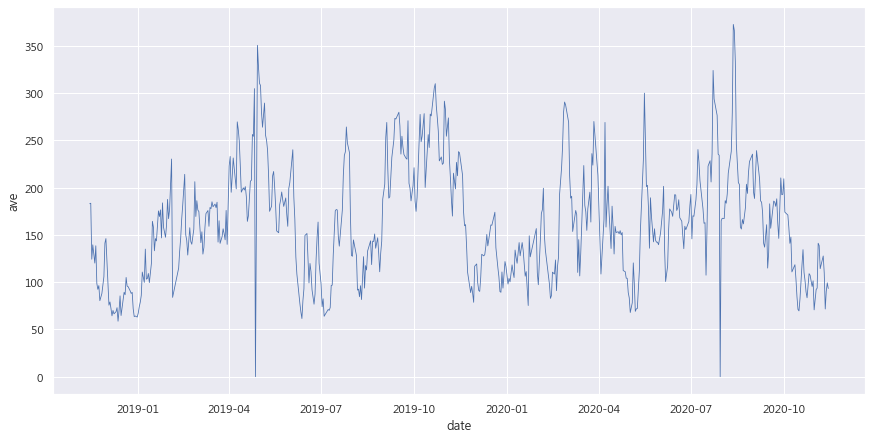

In [18]:
fig = plt.figure(constrained_layout=True, figsize=(12,6))
grid = gridspec.GridSpec(ncols=6, nrows=6, figure=fig)
ax1 = fig.add_subplot(grid[:, :])
## Set the title. 


sns.lineplot(x='date', y="ave", data=train_plot.loc['2018-11-14':'2020-11-14',:].reset_index(), linewidth = 0.8)

<Figure size 432x288 with 0 Axes>

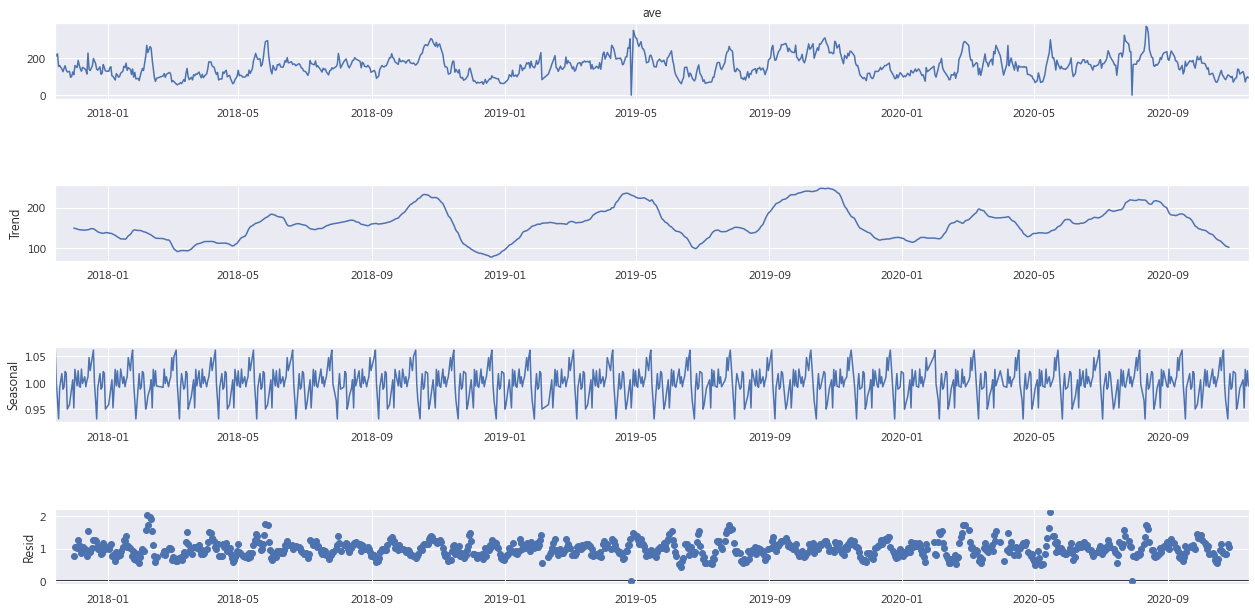

In [23]:
decomposition = seasonal_decompose(train_plot.ave.loc['2017-11-14':'2020-11-14'], model='multiplicative', period=30)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(20, 10)

ADF Test:
Null Hypothesis: Not Stationary
ADF Statistic: -12.132429
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
KPSS Test:
Null Hypothesis: Stationary
KPSS Statistic: 0.694253
p-value: 0.014068
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


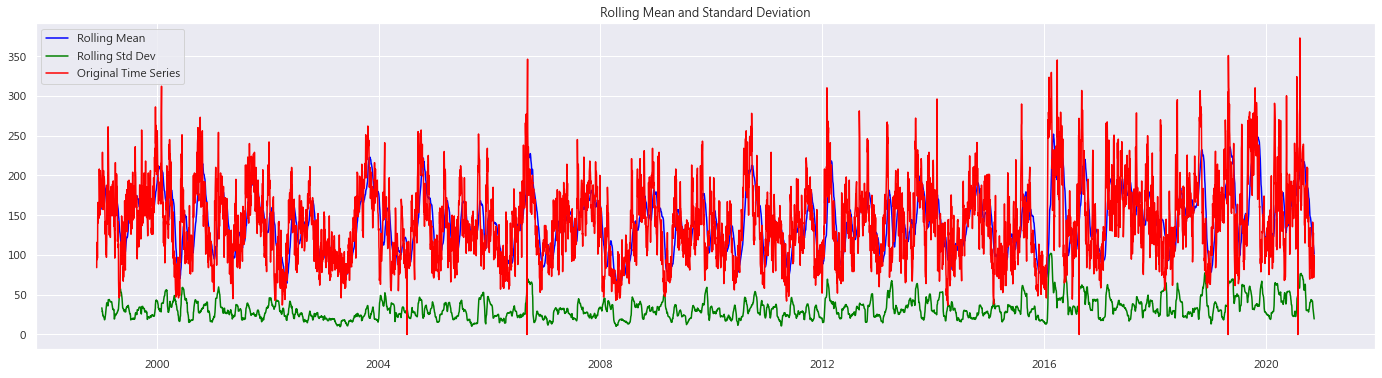

In [24]:
def stationarity_test(stock_close_price):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = stock_close_price.rolling(30).mean()
    rolling_std_dev = stock_close_price.rolling(30).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(stock_close_price, color='red',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(stock_close_price,autolag='AIC')
    print('Null Hypothesis: Not Stationary')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))

    print("KPSS Test:")
    kpss_test = kpss(stock_close_price, regression='c', nlags=None, store=False)
    print('Null Hypothesis: Stationary')
    print('KPSS Statistic: %f' % kpss_test[0])
    print('p-value: %f' % kpss_test[1])
    print('Critical Values:')
    for key, value in kpss_test[3].items():
        print('\t%s: %.3f' % (key, value))
    
stationarity_test(train.ave)

C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  lo

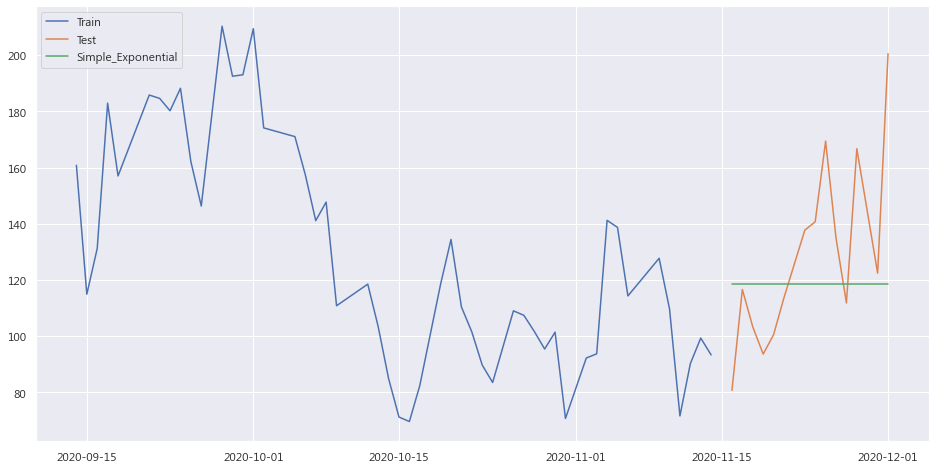

Simple Exponential Smoothing RMS :- 33.199 & Smoothing Level :- 0.05


In [31]:

# Simple Exponential Smoothing Method
pred_values = test.ave.copy()
pred_values = pd.DataFrame(pred_values)

Simple_Exponential_df = pd.DataFrame(columns = ['RMS','Smoothing Level'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
  fit_sim_exp = SimpleExpSmoothing(np.asarray(train.ave)).fit(smoothing_level = i[0])
  pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test.ave))

  rms = round(sqrt(mean_squared_error(test.ave.values, pred_values.Simple_Exponential)),3)
  Simple_Exponential_df = Simple_Exponential_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0]} , ignore_index=True)

opt_values = Simple_Exponential_df.loc[Simple_Exponential_df['RMS'] == min(Simple_Exponential_df['RMS']),['Smoothing Level']].values


# Using optimised values from the lists.
fit_sim_exp = SimpleExpSmoothing(np.asarray(train.ave)).fit(smoothing_level = opt_values[0][0])
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test.ave))

plt.figure(figsize=(16,8))
plt.plot(train.ave.loc['2020-09-14':,], label='Train')
plt.plot(test.ave.loc['2020-09-14':,], label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.legend(loc='best')
plt.show()

rms_sim_exp = sqrt(mean_squared_error(test.ave.values, pred_values.Simple_Exponential))
print("Simple Exponential Smoothing RMS :- " + str(round(rms_sim_exp,3)) + " & Smoothing Level :- "+str(round(opt_values[0][0],3)))


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=60997.487, Time=0.81 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85195.810, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=61223.542, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=77669.923, Time=0.48 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=60820.994, Time=1.55 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=4.17 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=4.82 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=60936.374, Time=0.88 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.24 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=3.18 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=60706.719, Time=6.99 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60744.192, Time=2.60 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=60754.355, Time=0.89 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60707.0

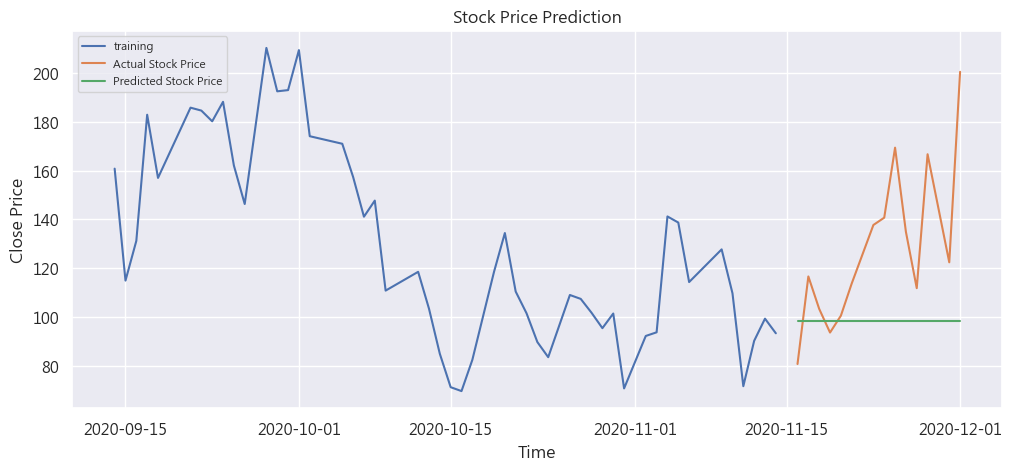

NameError: name 'test_data' is not defined

In [33]:
arima_model = auto_arima(train.ave,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train.ave) 
print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict(len(test.ave), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=test.ave.index)

#Plotting the predicted stock price and original price.


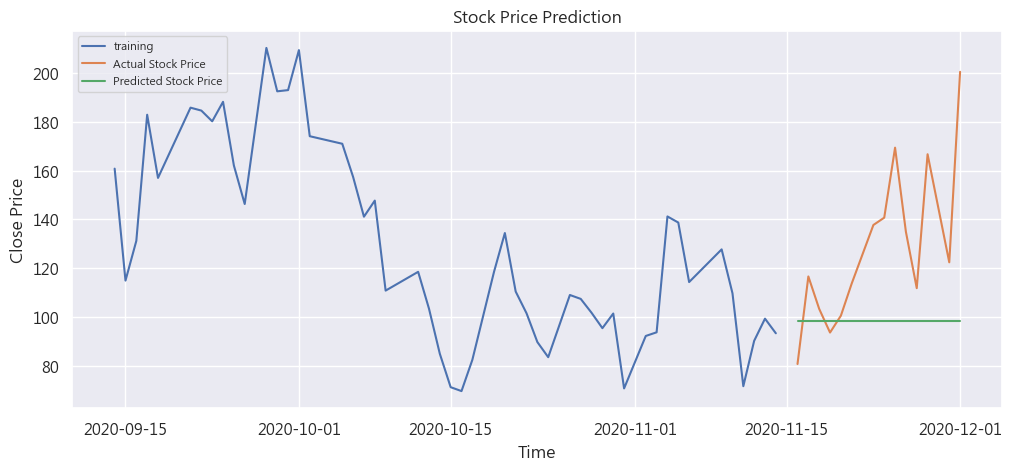

Auto-Arima RMSE :- 43.67


In [34]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.ave.loc['2020-09-14':,], label='training')
plt.plot(test.ave, label='Actual Stock Price')
plt.plot(fcv_series,label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = sqrt(mean_squared_error(test.ave, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

In [40]:
train[-15]

,highest,high,mid,low,ave,volume
date,,,,,,
1998-12-01,195,131,77,59,84.0,327
1998-12-02,165,144,111,93,113.0,456
1998-12-03,204,160,82,65,94.0,432
1998-12-04,189,161,114,80,116.0,583
1998-12-06,181,157,90,55,96.0,1052
...,...,...,...,...,...,...
2020-11-10,161,159,111,57,109.7,299
2020-11-11,142,142,54,54,71.6,75
2020-11-12,155,145,85,52,90.2,160


In [63]:
model = auto_arima(train.ave, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p and q

                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=60997.487, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=85195.810, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=61223.542, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=77669.923, Time=0.45 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=60820.994, Time=1.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=4.16 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=4.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=60936.374, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=2.98 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=60706.719, Time=6.63 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=60744.192, Time=2.72 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=60754.355, Time=1.02 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=60707.0

C:\Users\user\anaconda3\envs\TSA\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


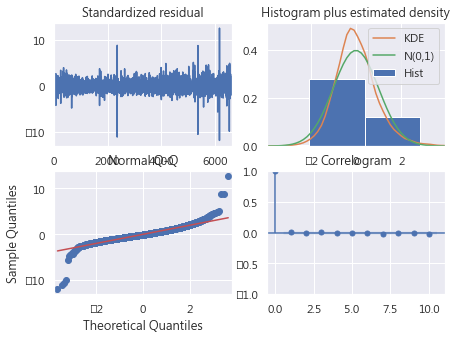

In [64]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [39]:
mod = ARIMA(train.ave, order=(3, 1, 3))
results = mod.fit()
print(results.summary())

C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                  D.ave   No. Observations:                 6629
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -30341.205
Method:                       css-mle   S.D. of innovations             23.516
Date:                Thu, 14 Jan 2021   AIC                          60698.410
Time:                        02:29:48   BIC                          60752.803
Sample:                             1   HQIC                         60717.204
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0027      0.002      1.523      0.128      -0.001       0.006
ar.L1.D.ave     0.9634      0.011     91.503      0.000       0.943       0.984
ar.L2.D.ave     0.3318      0.022     15.179    

C:\Users\user\anaconda3\envs\TSA\lib\site-packages\statsmodels\tsa\arima_model.py:1490: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\user\anaconda3\envs\TSA\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [52]:
test.ave

date
2020-11-16     80.7
2020-11-17    116.6
2020-11-18    103.3
2020-11-19     93.6
2020-11-20    100.5
2020-11-21    113.7
2020-11-23    137.7
2020-11-24    140.7
2020-11-25    169.4
2020-11-26    134.9
2020-11-27    111.8
2020-11-28    166.7
2020-11-30    122.4
2020-12-01    200.5
Name: ave, dtype: float64

In [41]:
fc

array([ 99.06957907, 103.14223574, 106.56520678, 109.31949796,
       111.77130857, 113.92321371, 115.90542943, 117.72399805,
       119.42709816, 121.02038603, 122.52331134, 123.94066647,
       125.28166397, 126.5503819 ])

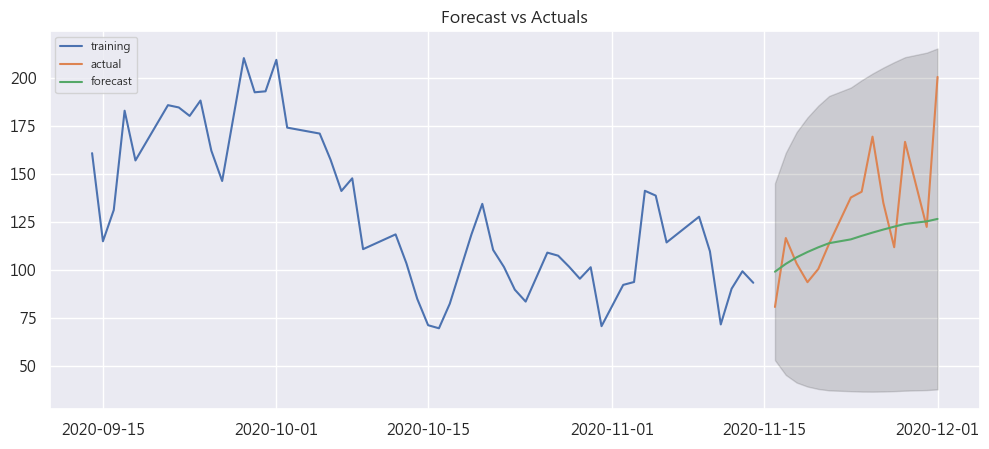

The Root Mean Squared Error of our forecasts is 29.3


In [69]:


fc, se, conf = results.forecast(14, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.ave.loc['2020-09-14':,], label='training')
plt.plot(test.ave, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse = ((test.ave - fc_series) ** 2).mean()

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [13]:
p_train_ave = train.ave.reset_index()
p_train_ave.columns = ['ds', 'y']
p_train_ave

,ds,y
0,1998-12-01,84.0
1,1998-12-02,113.0
2,1998-12-03,94.0
3,1998-12-04,116.0
4,1998-12-06,96.0
...,...,...
6625,2020-11-10,109.7
6626,2020-11-11,71.6
6627,2020-11-12,90.2
6628,2020-11-13,99.3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


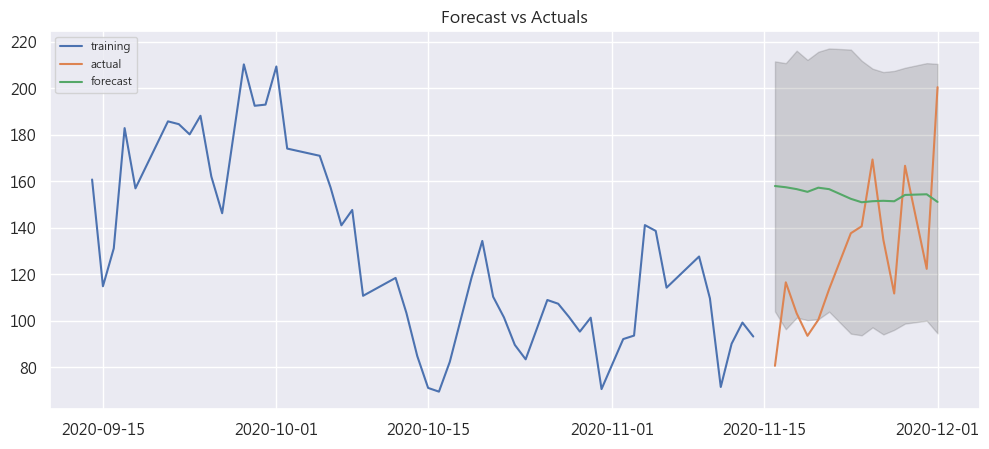

The Root Mean Squared Error of our forecasts is 42.69


In [71]:
# all

model = Prophet()

# 訓練模型
model.fit(p_train_ave)
# 建構預測集
future = model.make_future_dataframe(periods=14) #forecasting for 1 year from now.
# 進行預測
forecast = model.predict(future)


yhat =  forecast.tail(14).yhat.to_numpy()
yhat_lower =  forecast.tail(14).yhat_lower.to_numpy()
yhat_upper =  forecast.tail(14).yhat_upper.to_numpy()

# Make as pandas series
fc_series = pd.Series(yhat, index=test.index)
lower_series = pd.Series(yhat_lower, index=test.index)
upper_series = pd.Series(yhat_upper, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.ave.loc['2020-09-14':,], label='training')
plt.plot(test.ave, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse = ((test.ave - fc_series) ** 2).mean()

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


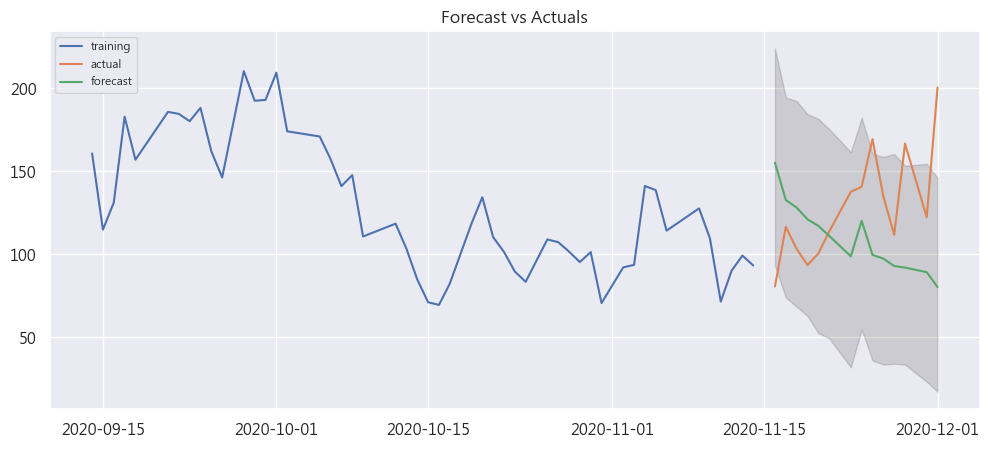

The Root Mean Squared Error of our forecasts is 51.5


In [72]:
# 1000

model = Prophet()

# 訓練模型
model.fit(p_train_ave.tail(1000))
# 建構預測集
future = model.make_future_dataframe(periods=14) #forecasting for 1 year from now.
# 進行預測
forecast = model.predict(future)


yhat =  forecast.tail(14).yhat.to_numpy()
yhat_lower =  forecast.tail(14).yhat_lower.to_numpy()
yhat_upper =  forecast.tail(14).yhat_upper.to_numpy()

# Make as pandas series
fc_series = pd.Series(yhat, index=test.index)
lower_series = pd.Series(yhat_lower, index=test.index)
upper_series = pd.Series(yhat_upper, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.ave.loc['2020-09-14':,], label='training')
plt.plot(test.ave, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse = ((test.ave - fc_series) ** 2).mean()

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


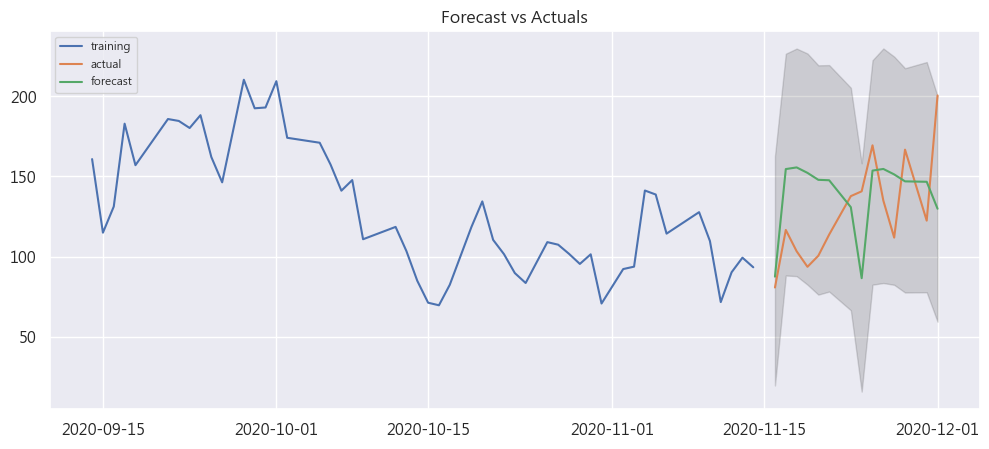

The Root Mean Squared Error of our forecasts is 39.82


In [73]:
# 365

model = Prophet()

# 訓練模型
model.fit(p_train_ave.tail(365))
# 建構預測集
future = model.make_future_dataframe(periods=14) #forecasting for 1 year from now.
# 進行預測
forecast = model.predict(future)


yhat =  forecast.tail(14).yhat.to_numpy()
yhat_lower =  forecast.tail(14).yhat_lower.to_numpy()
yhat_upper =  forecast.tail(14).yhat_upper.to_numpy()

# Make as pandas series
fc_series = pd.Series(yhat, index=test.index)
lower_series = pd.Series(yhat_lower, index=test.index)
upper_series = pd.Series(yhat_upper, index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train.ave.loc['2020-09-14':,], label='training')
plt.plot(test.ave, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

mse = ((test.ave - fc_series) ** 2).mean()

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [1]:
from statsmodels.tsa.statespace.varmax import VARMAX
from random import random
# contrived dataset with dependency

# fit model
model = VARMAX(train.values, order=(3, 3))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.forecast(14)

mse = ((test.ave - yhat[4]) ** 2).mean()

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

NameError: name 'train' is not defined

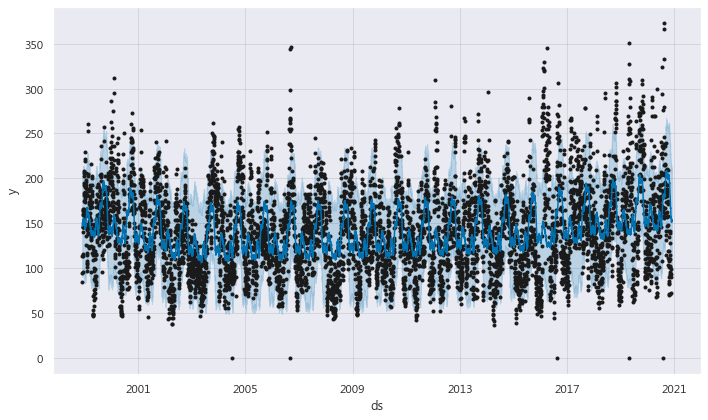

In [20]:
figure=model.plot(forecast)

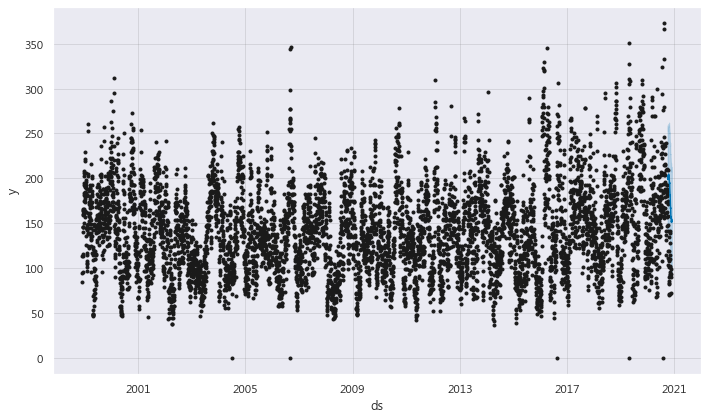

In [27]:
figure=model.plot(forecast.tail(50))